In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.6 MB 19.3 MB/s 
     |████████████████████████████████| 182 kB 55.1 MB/s 


In [ ]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import requests

from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

In [ ]:
processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

Downloading:   0%|          | 0.00/368 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/974 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/603M [00:00<?, ?B/s]

In [ ]:
url = "https://cs.stanford.edu/people/rak248/VG_100K_2/3774.jpg"
image = Image.open("/content/test.png")
prompts = ["yellow license plate", "car moving towards the camera", "car closer to women", "red bus near guy with blue jacket", "red bus", "car in middle of road behind black car"]
inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt")

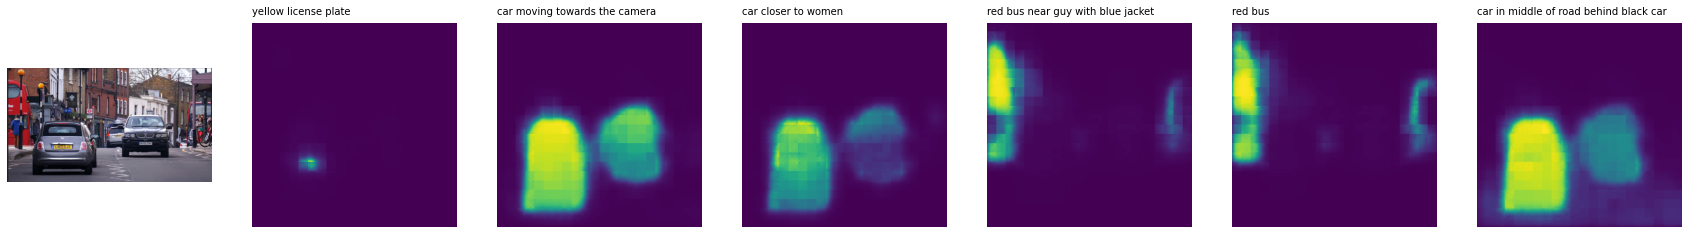

In [ ]:
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

_, ax = plt.subplots(1, len(prompts) + 1, figsize=(30, 8))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))];
[ax[i+1].text(0, -15, prompts[i]) for i in range(len(prompts))];